In [38]:
from qiskit import *
import matplotlib as mp
from qiskit.tools.visualization import plot_histogram

In [39]:
input = QuantumRegister(2)
qr = QuantumRegister(2)
carry = ClassicalRegister(1)
sum = ClassicalRegister(1)
circuit = QuantumCircuit(input,qr,sum,carry)

In [40]:
def add(circuit,input,qr,carry,sum):
  circuit.cx(input[0],qr[0])
  circuit.cx(input[1],qr[0])
  circuit.ccx(input[0],input[1],qr[1])
  circuit.measure(qr[0], sum)
  circuit.measure(qr[1],carry)

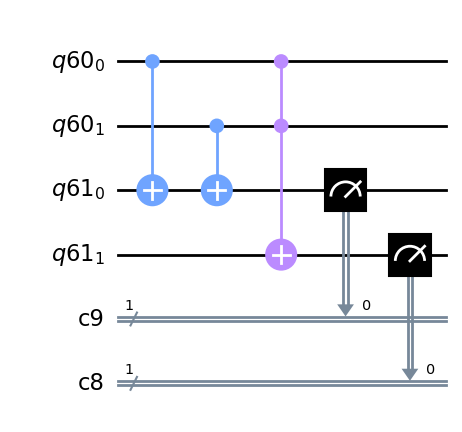

In [41]:
#case inputs are 0,0
add(circuit,input,qr,carry,sum)
circuit.draw(output='mpl')

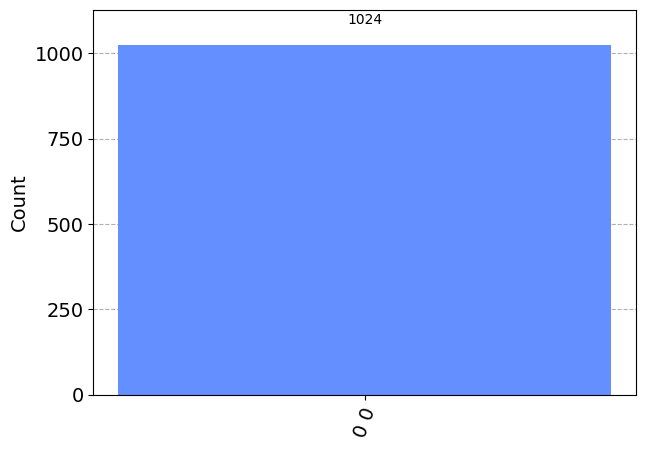

In [42]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))


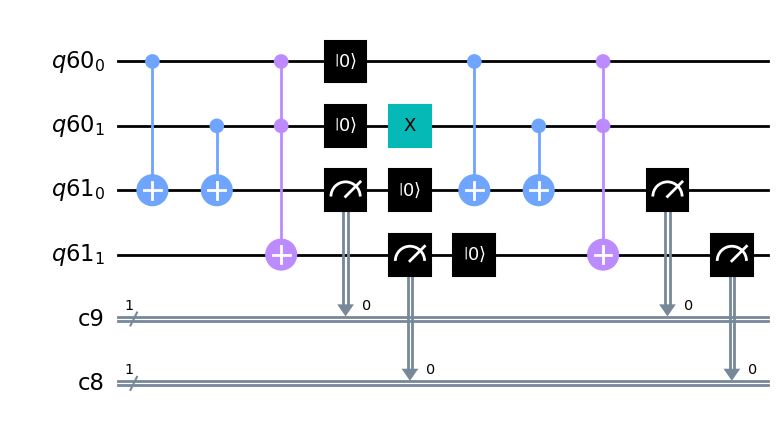

In [43]:
#case: inputs are 0,1
circuit.reset(qr)
circuit.reset(input)
circuit.x(input[1])
add(circuit,input,qr,carry,sum)
circuit.draw(output='mpl')

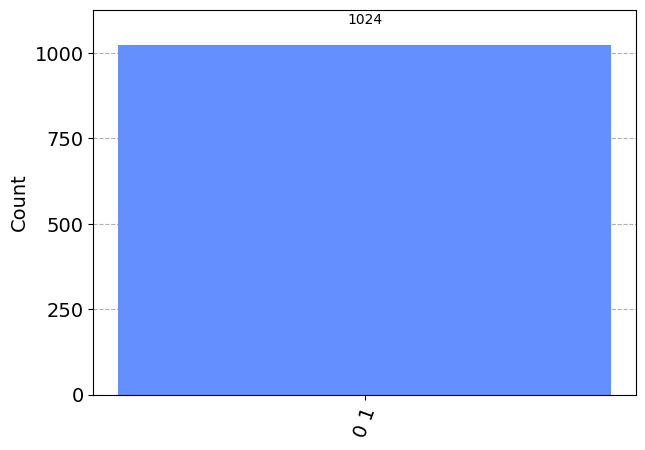

In [44]:
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))


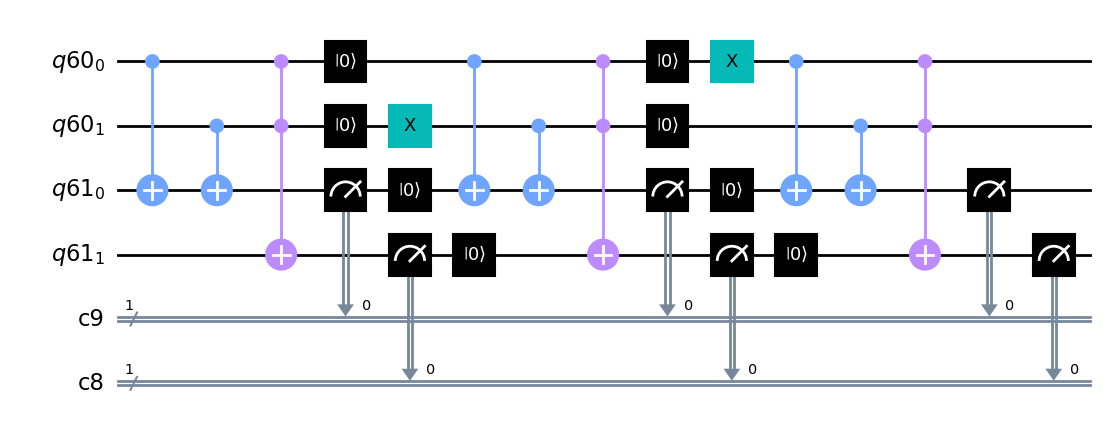

In [45]:
#case: inputs are 1,0
circuit.reset(qr)
circuit.reset(input)
circuit.x(input[0])

add(circuit,input,qr,carry,sum)
circuit.draw(output='mpl')

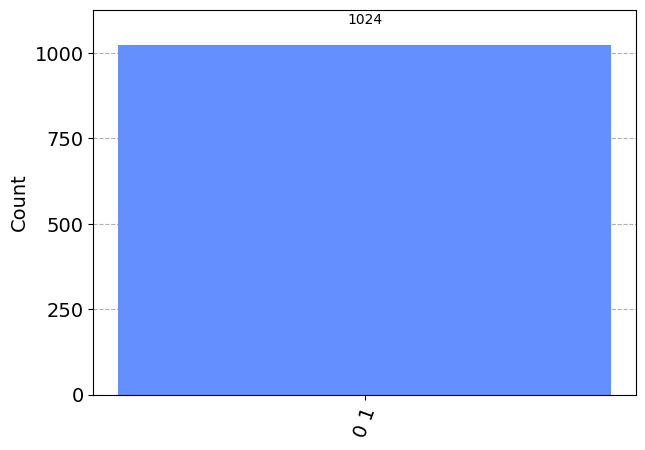

In [46]:
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))


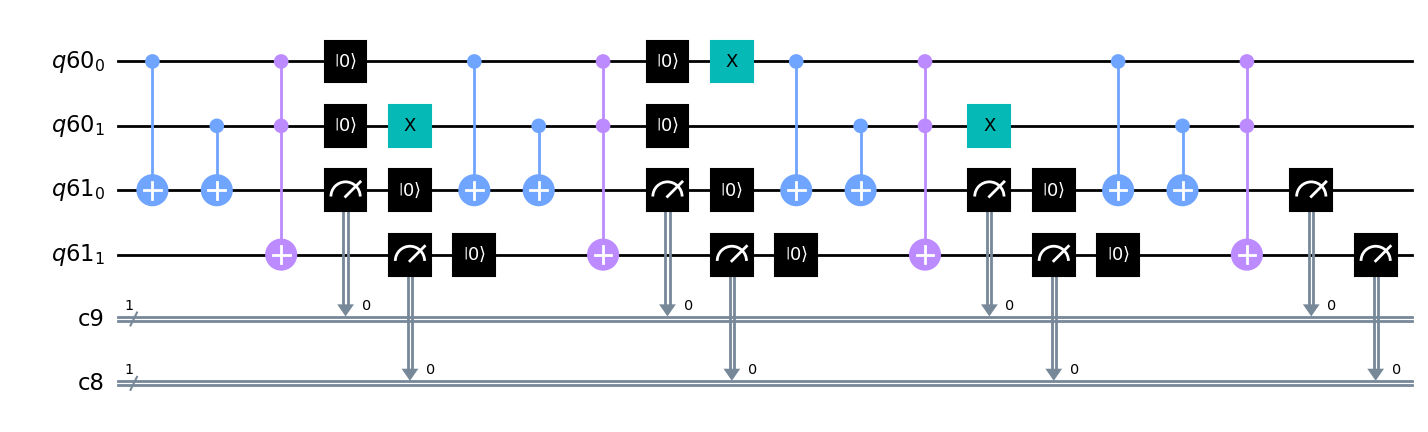

In [47]:
#case: inputs are 1,1
circuit.x(input[1])
circuit.reset(qr)
add(circuit,input,qr,carry,sum)
circuit.draw(output='mpl')

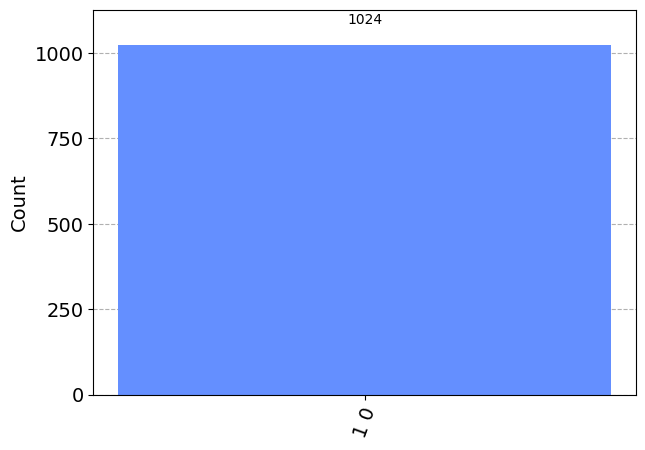

In [48]:
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))